In [107]:
# load pandas package
import pandas as pd
# load dataset from csv file
netflix = pd.read_csv('netflix_dataset.csv', index_col=None)
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"""September 25, 2021""",2020,PG-13,90 min,Documentaries,"""As her father nears the end of his life, film..."
1,TV Show,Blood & Water,NaN,"""Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"""September 24, 2021""",2021,TV-MA,2 Seasons,"""International TV Shows, TV Dramas, TV Mysteries""","""After crossing paths at a party, a Cape Town ..."
2,TV Show,Ganglands,Julien Leclercq,"""Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"""September 24, 2021""",2021,TV-MA,1 Season,"""Crime TV Shows, International TV Shows, TV Ac...","""To protect his family from a powerful drug lo..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"""September 24, 2021""",2021,TV-MA,1 Season,"""Docuseries, Reality TV""","""Feuds, flirtations and toilet talk go down am..."
4,TV Show,Kota Factory,NaN,"""Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"""September 24, 2021""",2021,TV-MA,2 Seasons,"""International TV Shows, Romantic TV Shows, TV...","""In a city of coaching centers known to train ..."


This datdset, which I found from Kaggle, contains information of almost 8000 Netflix movies and shows.

In [108]:
# load other packages
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.graph_objects as go
import plotly.express as px
from pandas import DataFrame, Series

In [109]:
# Check Variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(netflix.columns):
    variables.loc[i] = [var, netflix[var].nunique(), netflix[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,type,2,"[Movie, TV Show]"
1,title,1818,"[Dick Johnson Is Dead, Blood & Water, Gangland..."
2,director,1051,"[Kirsten Johnson, nan, Julien Leclercq, Mike F..."
3,cast,1604,"[nan, ""Ama Qamata, Khosi Ngema, Gail Mabalane,..."
4,country,219,"[United States, South Africa, nan, India, ""Uni..."
5,date_added,302,"[""September 25, 2021"", ""September 24, 2021"", ""..."
6,release_year,52,"[2020, 2021, 1993, 2018, 1996, 1998, 1997, 201..."
7,rating,10,"[PG-13, TV-MA, PG, TV-14, TV-PG, TV-Y, TV-Y7, ..."
8,duration,162,"[90 min, 2 Seasons, 1 Season, 91 min, 125 min,..."
9,listed_in,300,"[Documentaries, ""International TV Shows, TV Dr..."


# Data Processing

In [110]:
# dealing with missing data
# checking datatype and missing values
netflix.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1818 non-null   object
 1   title         1818 non-null   object
 2   director      1226 non-null   object
 3   cast          1637 non-null   object
 4   country       1442 non-null   object
 5   date_added    1818 non-null   object
 6   release_year  1818 non-null   int64 
 7   rating        1818 non-null   object
 8   duration      1818 non-null   object
 9   listed_in     1818 non-null   object
 10  description   1818 non-null   object
dtypes: int64(1), object(10)
memory usage: 156.4+ KB


In [111]:
# checking the proportion of missing values in each column
for i in netflix.columns:
    missing_prop = netflix[i].isna().sum() / netflix.shape[0] * 100
    if missing_prop > 0:
        print(i, ': {:.2f}'.format(missing_prop))       

director : 32.56
cast : 9.96
country : 20.68


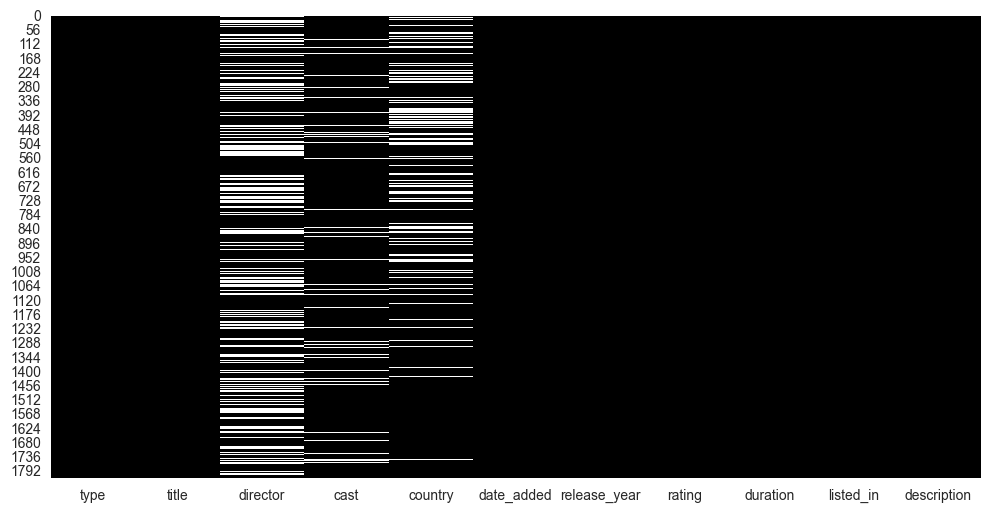

In [112]:
plt.figure(figsize=(12,6) , dpi=100)
sns.heatmap(netflix.isna(), cmap='binary_r', cbar = False)
plt.show()

Columns with substantial proportion of missing values are 'director', 'cast', 'country'

# Duration of the movies and TV Shows

In [113]:
netflix['rating'].replace(np.nan, netflix.rating.mode()[0], inplace=True)

netflix['date_added'] = pd.to_datetime(netflix['date_added'], format = '"%B %d, %Y"')
netflix['year_added'] = netflix['date_added'].dt.year

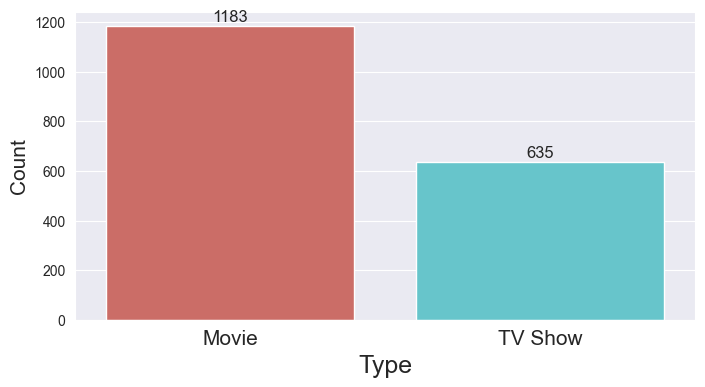

In [114]:
plt.figure(figsize=(8,4), dpi=100)
graph = sns.countplot(x='type',data = netflix, palette='hls')
plt.xticks(fontsize = 15)
plt.xlabel('Type', fontsize = 18)
plt.ylabel('Count', fontsize = 15)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 20, height , ha="center", fontsize=12)
    
plt.show()

In [115]:
nf_movies = netflix[netflix['type'] == 'Movie']
print('Number of movies in the dataset : ', nf_movies.shape[0])

nf_tv = netflix[netflix['type'] == 'TV Show']
print('Number of TV Shows in the dataset : ', nf_tv.shape[0])

Number of movies in the dataset :  1183
Number of TV Shows in the dataset :  635


In [116]:
nf_movies['duration'] = nf_movies['duration'].str.replace(' min', '')
duration = nf_movies['duration'].astype('int64')

duration.describe()

count    1183.000000
mean      101.229079
std        26.889555
min         8.000000
25%        90.000000
50%       101.000000
75%       115.000000
max       273.000000
Name: duration, dtype: float64

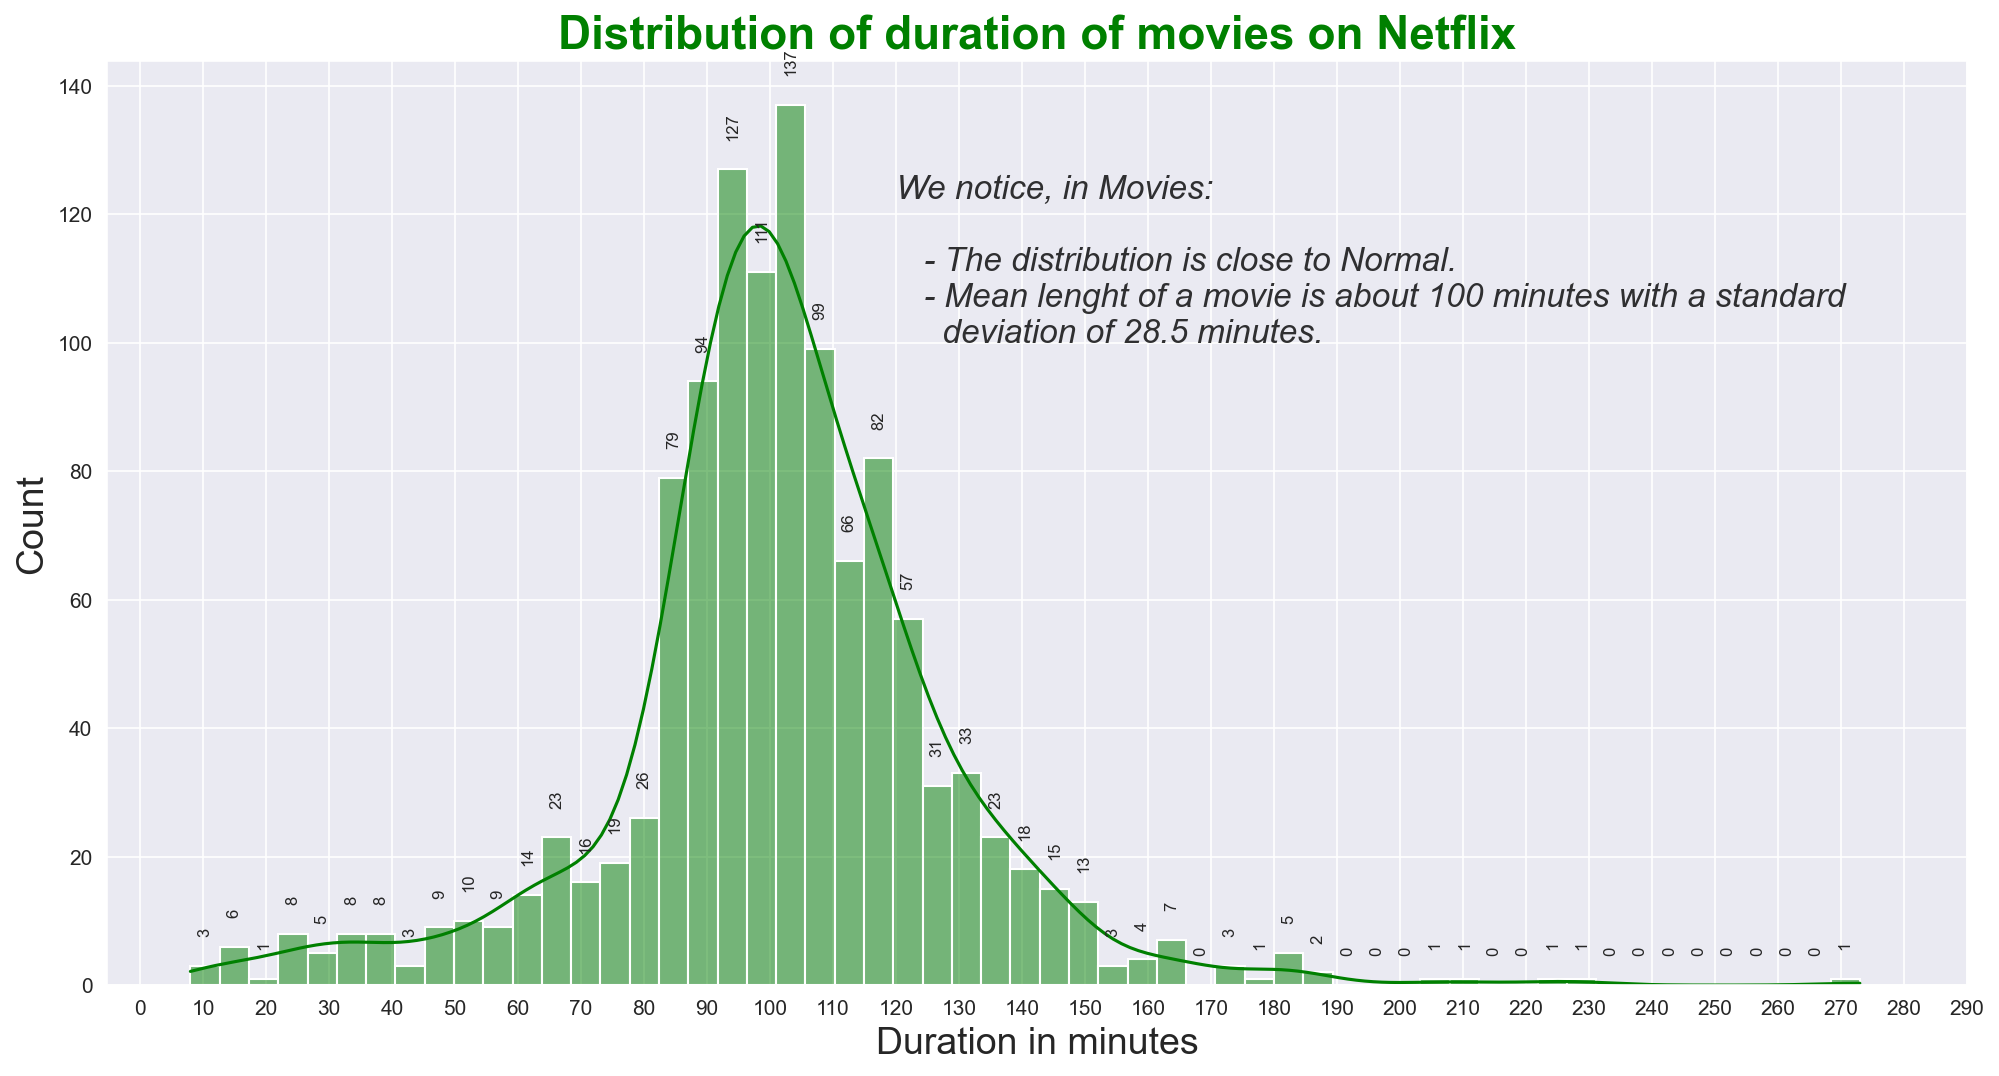

In [117]:
plt.figure(figsize=(16,8), dpi=150)

graph = sns.histplot(duration, color='g', kde=True)
plt.xlabel('Duration in minutes', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Distribution of duration of movies on Netflix', fontsize=22, weight='semibold', color='g')
plt.xticks(range(0,300,10), rotation=0)

text1 = 'We notice, in Movies:\n\n   - The distribution is close to Normal.\n   - Mean lenght of a movie is about 100 minutes with a standard\n     deviation of 28.5 minutes.'
plt.text(120, 100, text1, horizontalalignment='left', color='black', fontsize=16, alpha=0.8, fontstyle='italic')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 5, height , ha='center', fontsize=8, rotation='90')
    
plt.show()

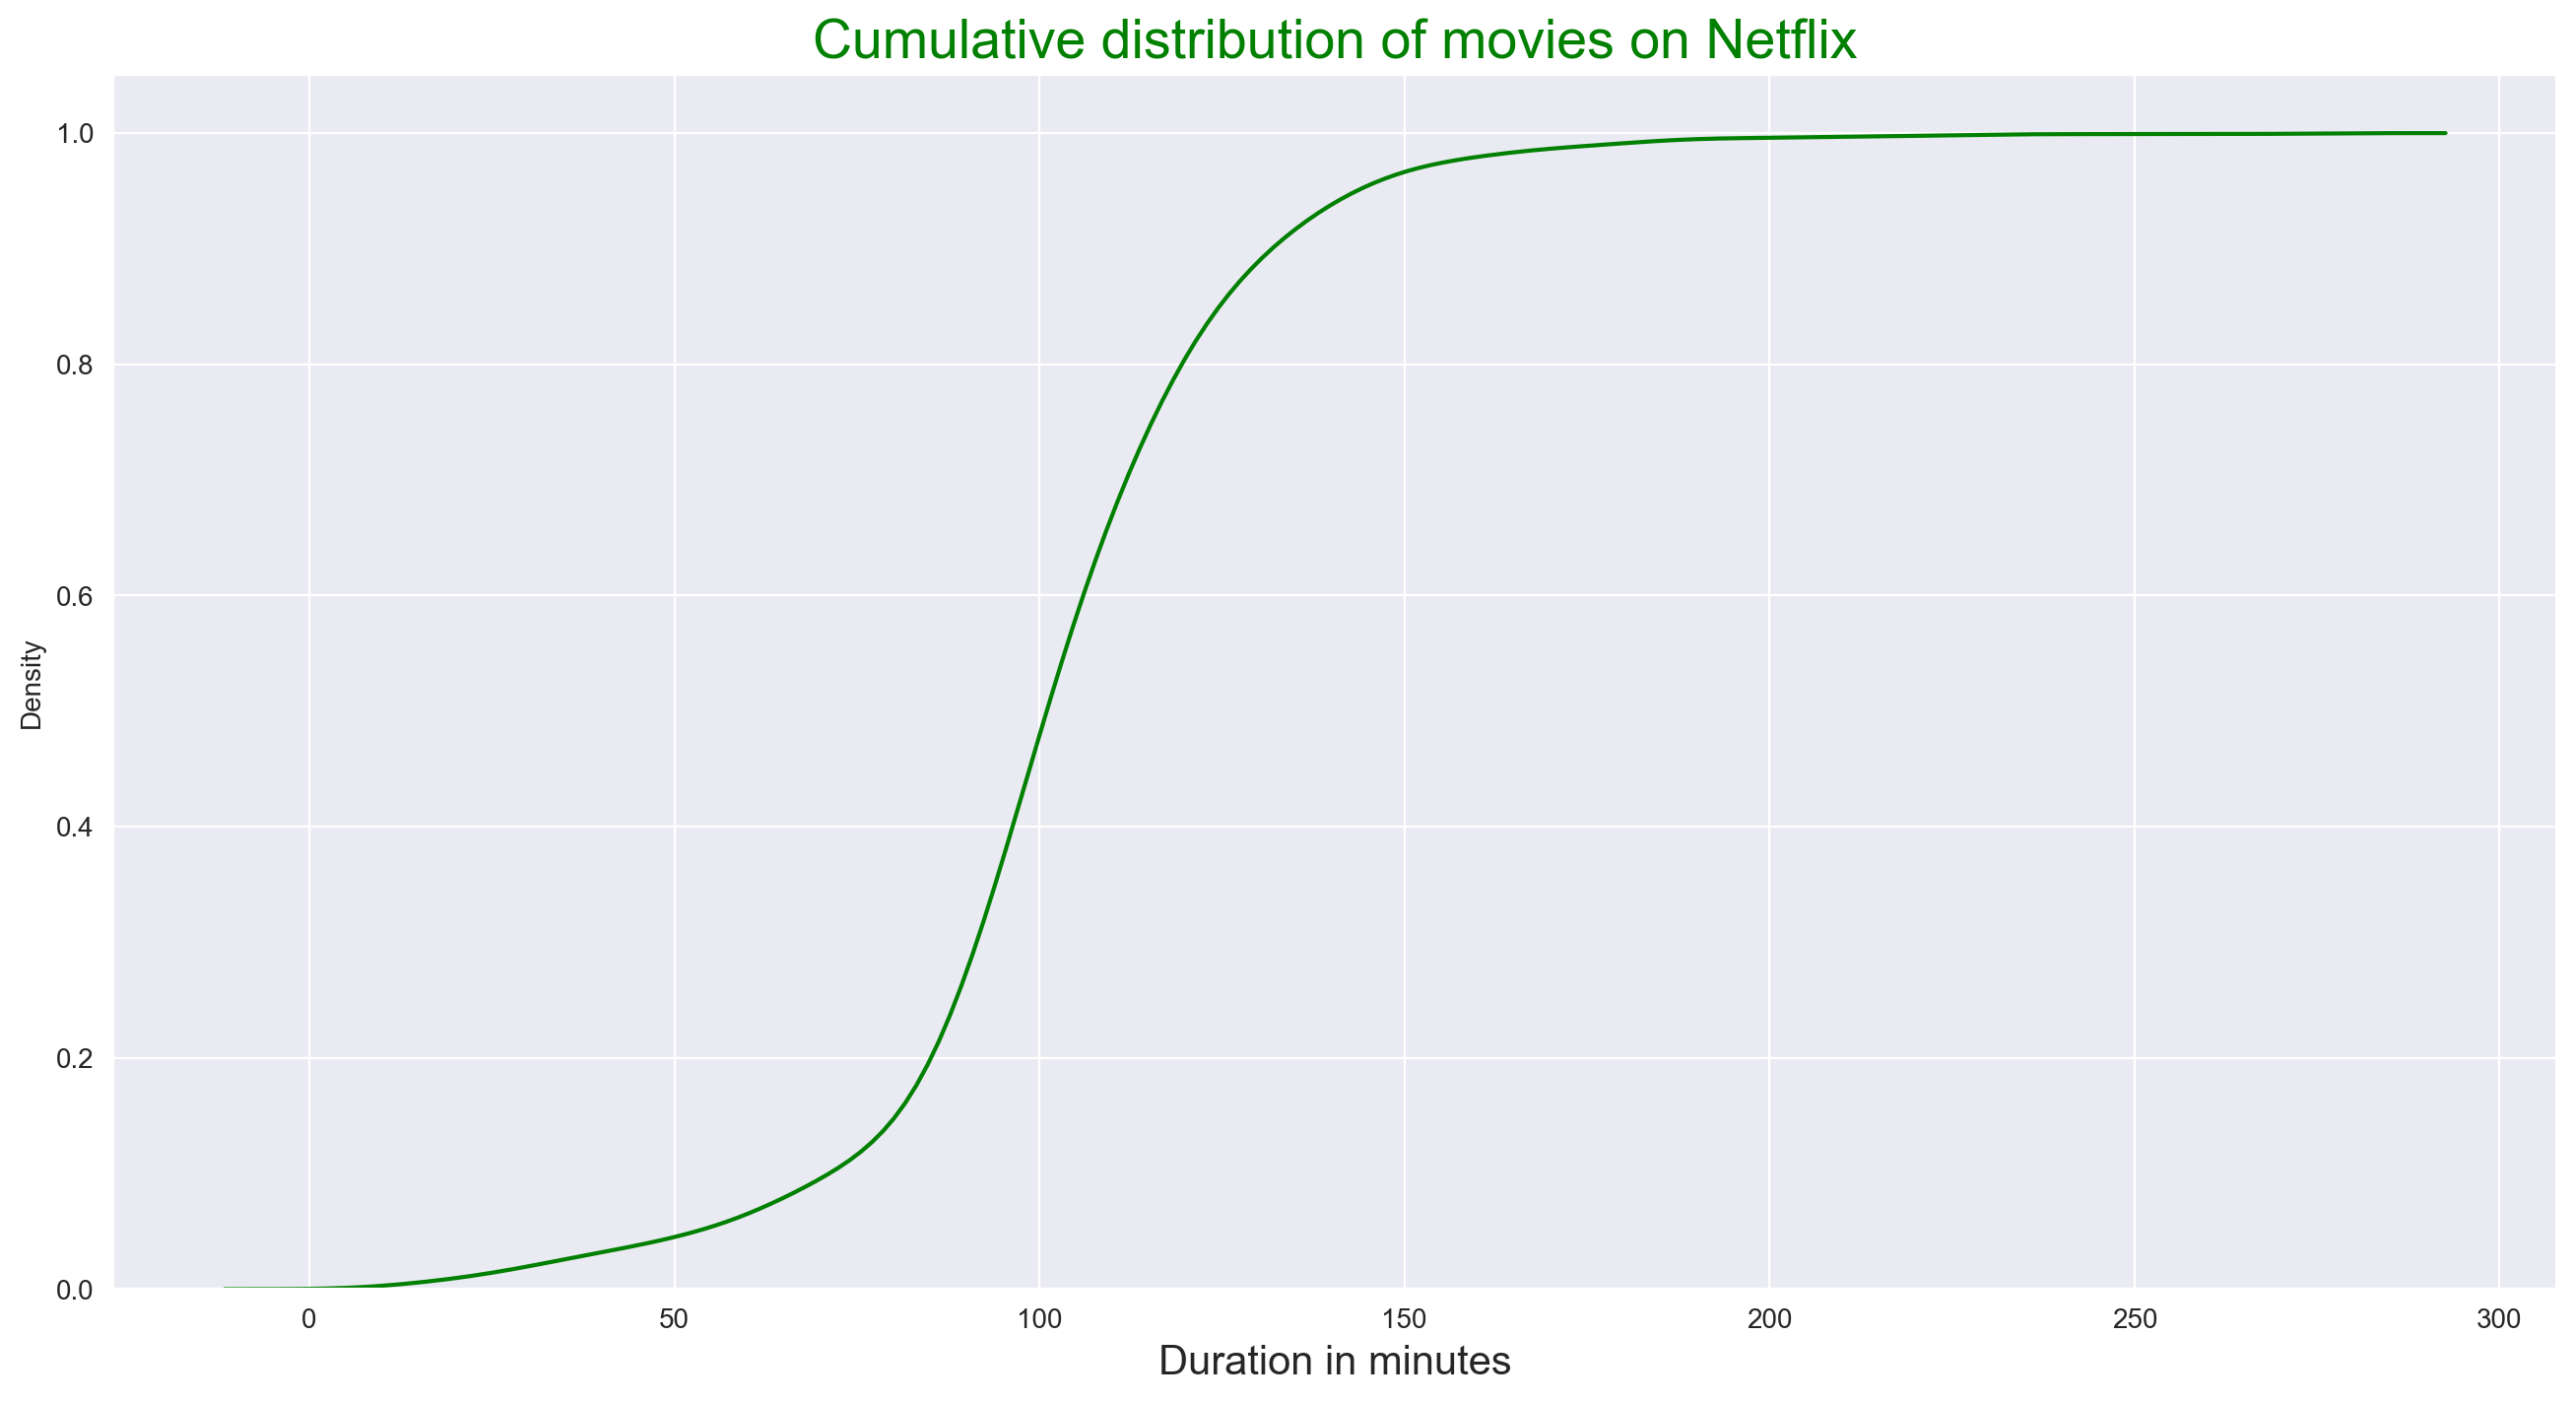

In [118]:
plt.figure(figsize=(16,8), dpi=200)
sns.kdeplot(duration, cumulative=True, color='g')
plt.xlabel('Duration in minutes', fontsize=15)
plt.title('Cumulative distribution of movies on Netflix', fontsize=20).set_color('g')
plt.show()

In [119]:
nf_tv['duration'] = nf_tv['duration'].str.replace(' Season', '')
nf_tv['duration'] = nf_tv['duration'].str.replace('s', '')
seasons = nf_tv['duration'].astype('int64')
seasons.describe()

count    635.000000
mean       1.943307
std        1.711880
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       17.000000
Name: duration, dtype: float64

In [120]:
nf_tv.duration.value_counts(normalize = True) * 100

1     59.370079
2     19.212598
3      8.976378
4      5.354331
5      2.519685
6      1.732283
7      1.259843
9      0.629921
10     0.472441
8      0.157480
17     0.157480
13     0.157480
Name: duration, dtype: float64

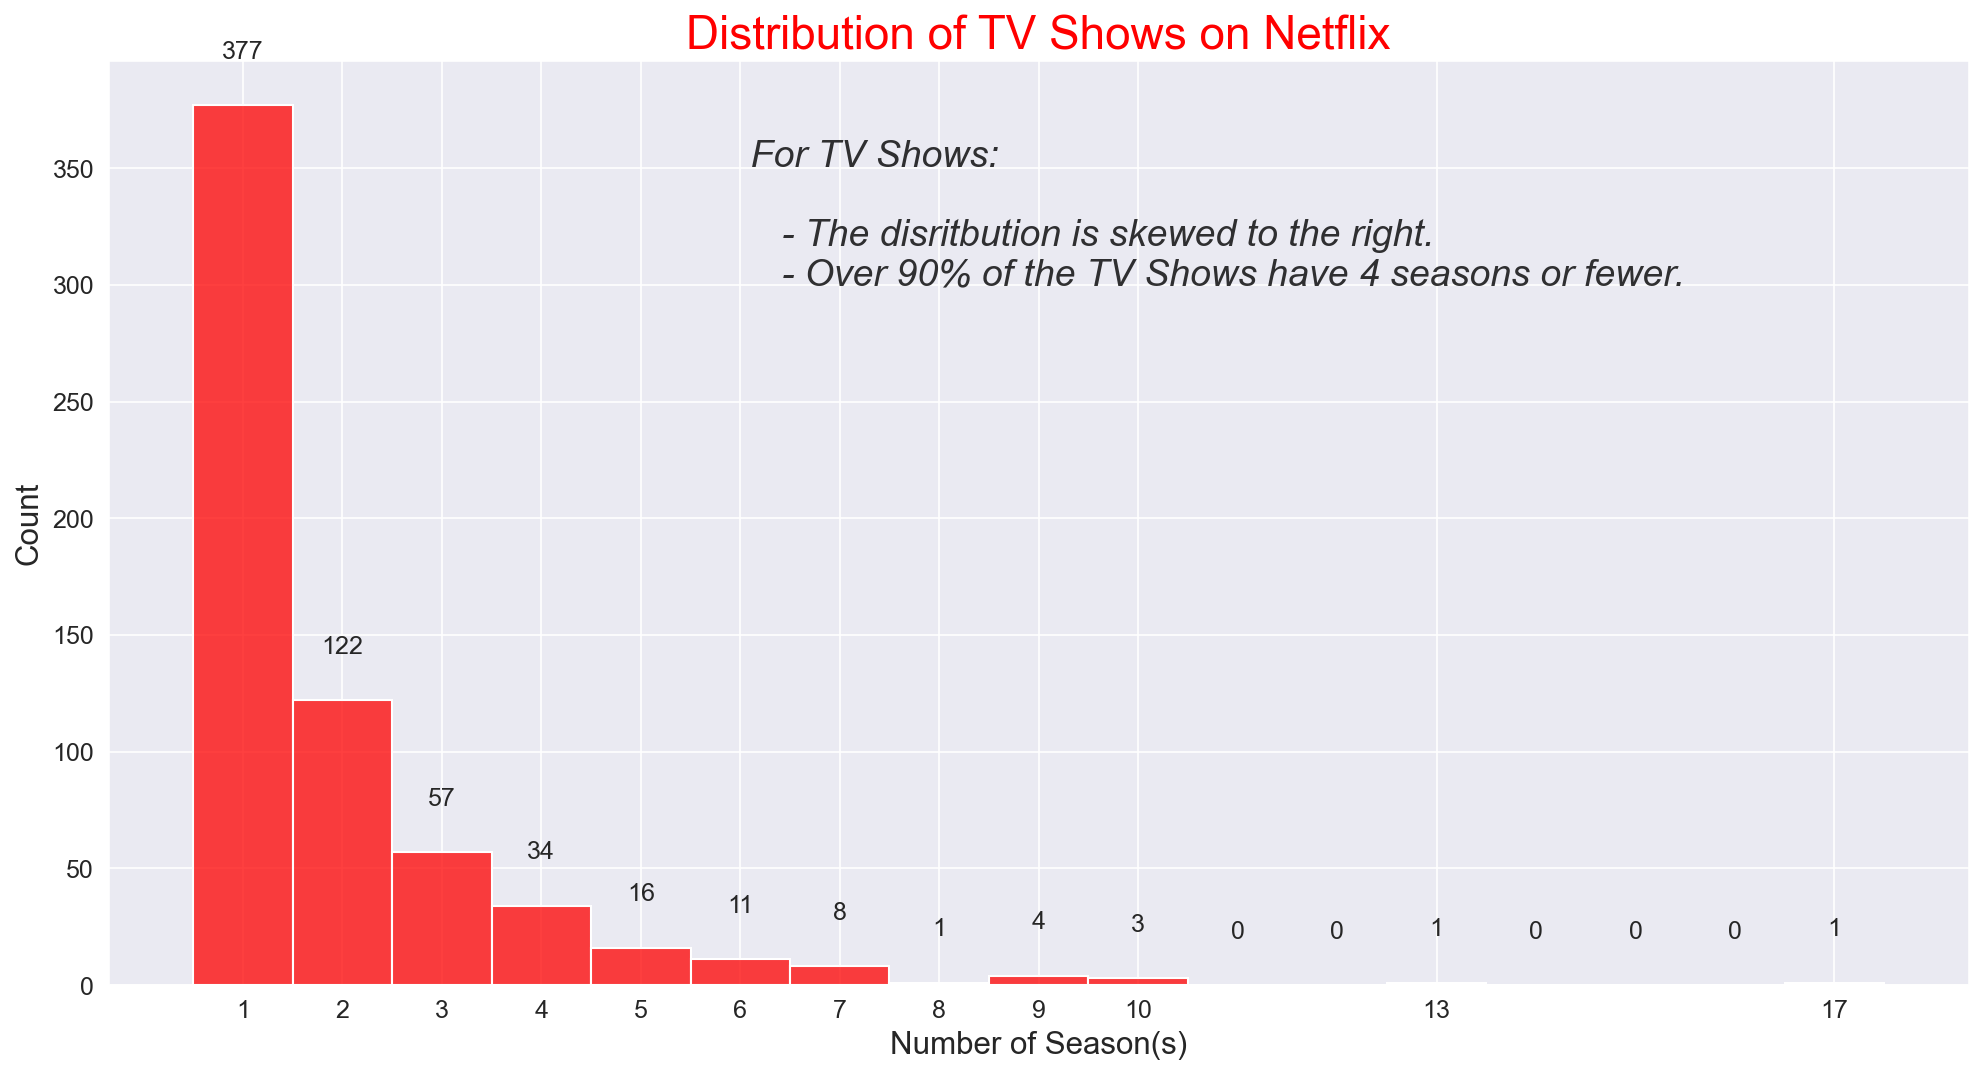

In [121]:
plt.figure(figsize=(16,8), dpi=150)

graph = sns.histplot(seasons, bins=16, discrete=True, color='r')

plt.xticks(seasons.unique(), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Number of Season(s)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of TV Shows on Netflix', fontsize=22).set_color('r')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 20, height , ha="center", fontsize=12)
    
text2 =' For TV Shows:\n\n    - The disritbution is skewed to the right.\n    - Over 90% of the TV Shows have 4 seasons or fewer.'
plt.text(6, 300, text2, horizontalalignment='left', color='black', fontsize=18, alpha=0.8, fontstyle='italic')
plt.show()

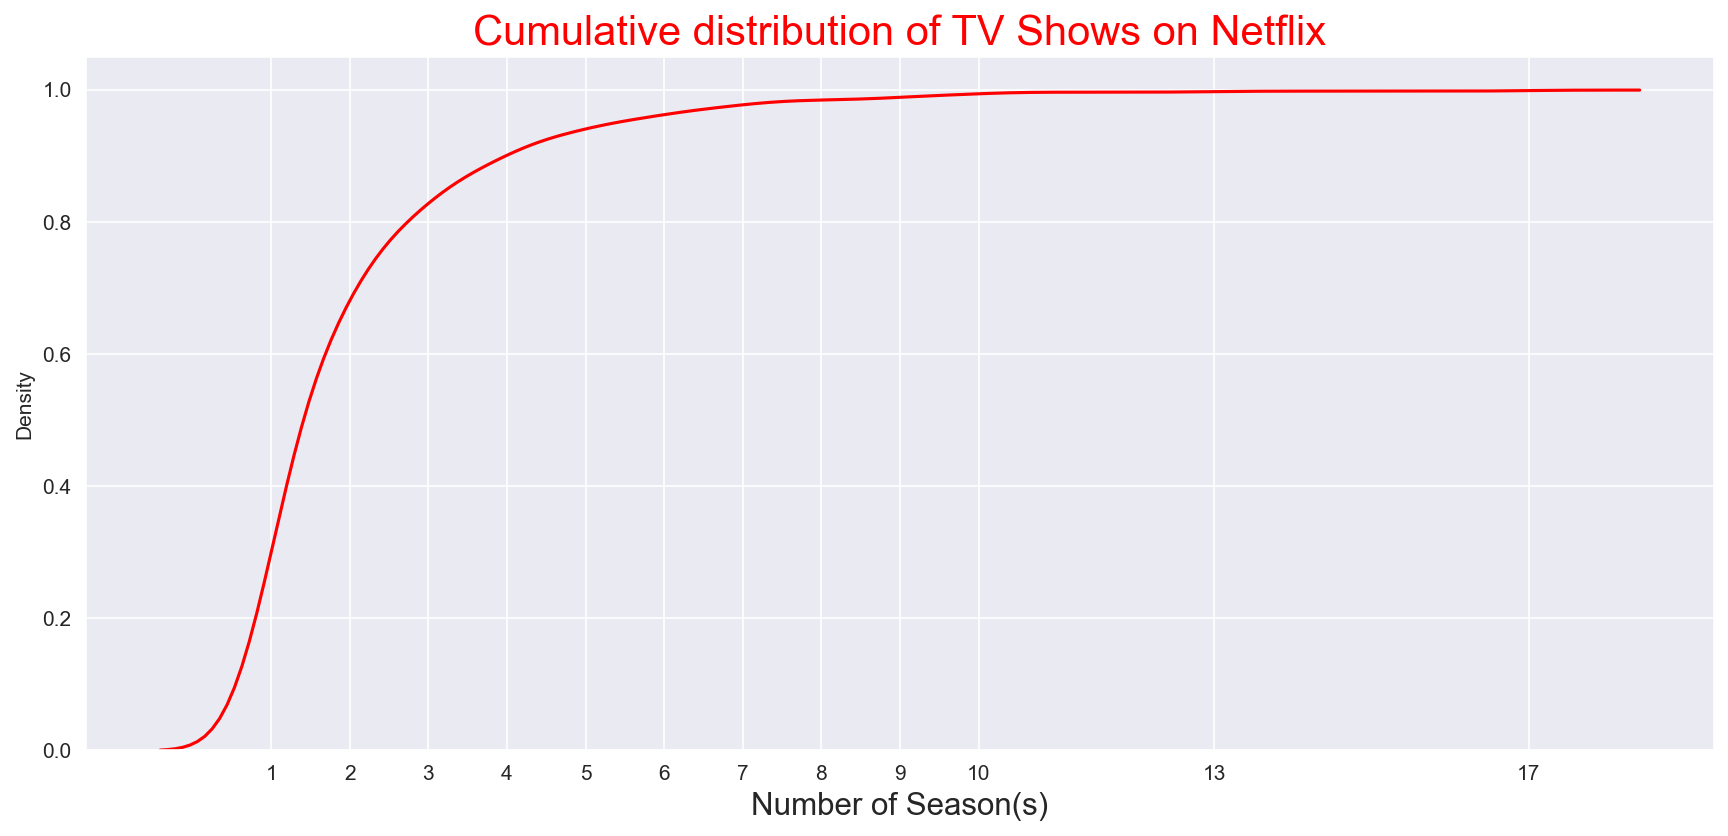

In [122]:
plt.figure(figsize=(14,6), dpi=150)

sns.kdeplot(seasons, cumulative=True, color='r')
plt.xticks(seasons.unique())
plt.xlabel('Number of Season(s)', fontsize=15)
plt.title('Cumulative distribution of TV Shows on Netflix', fontsize=20).set_color('r')
plt.show()

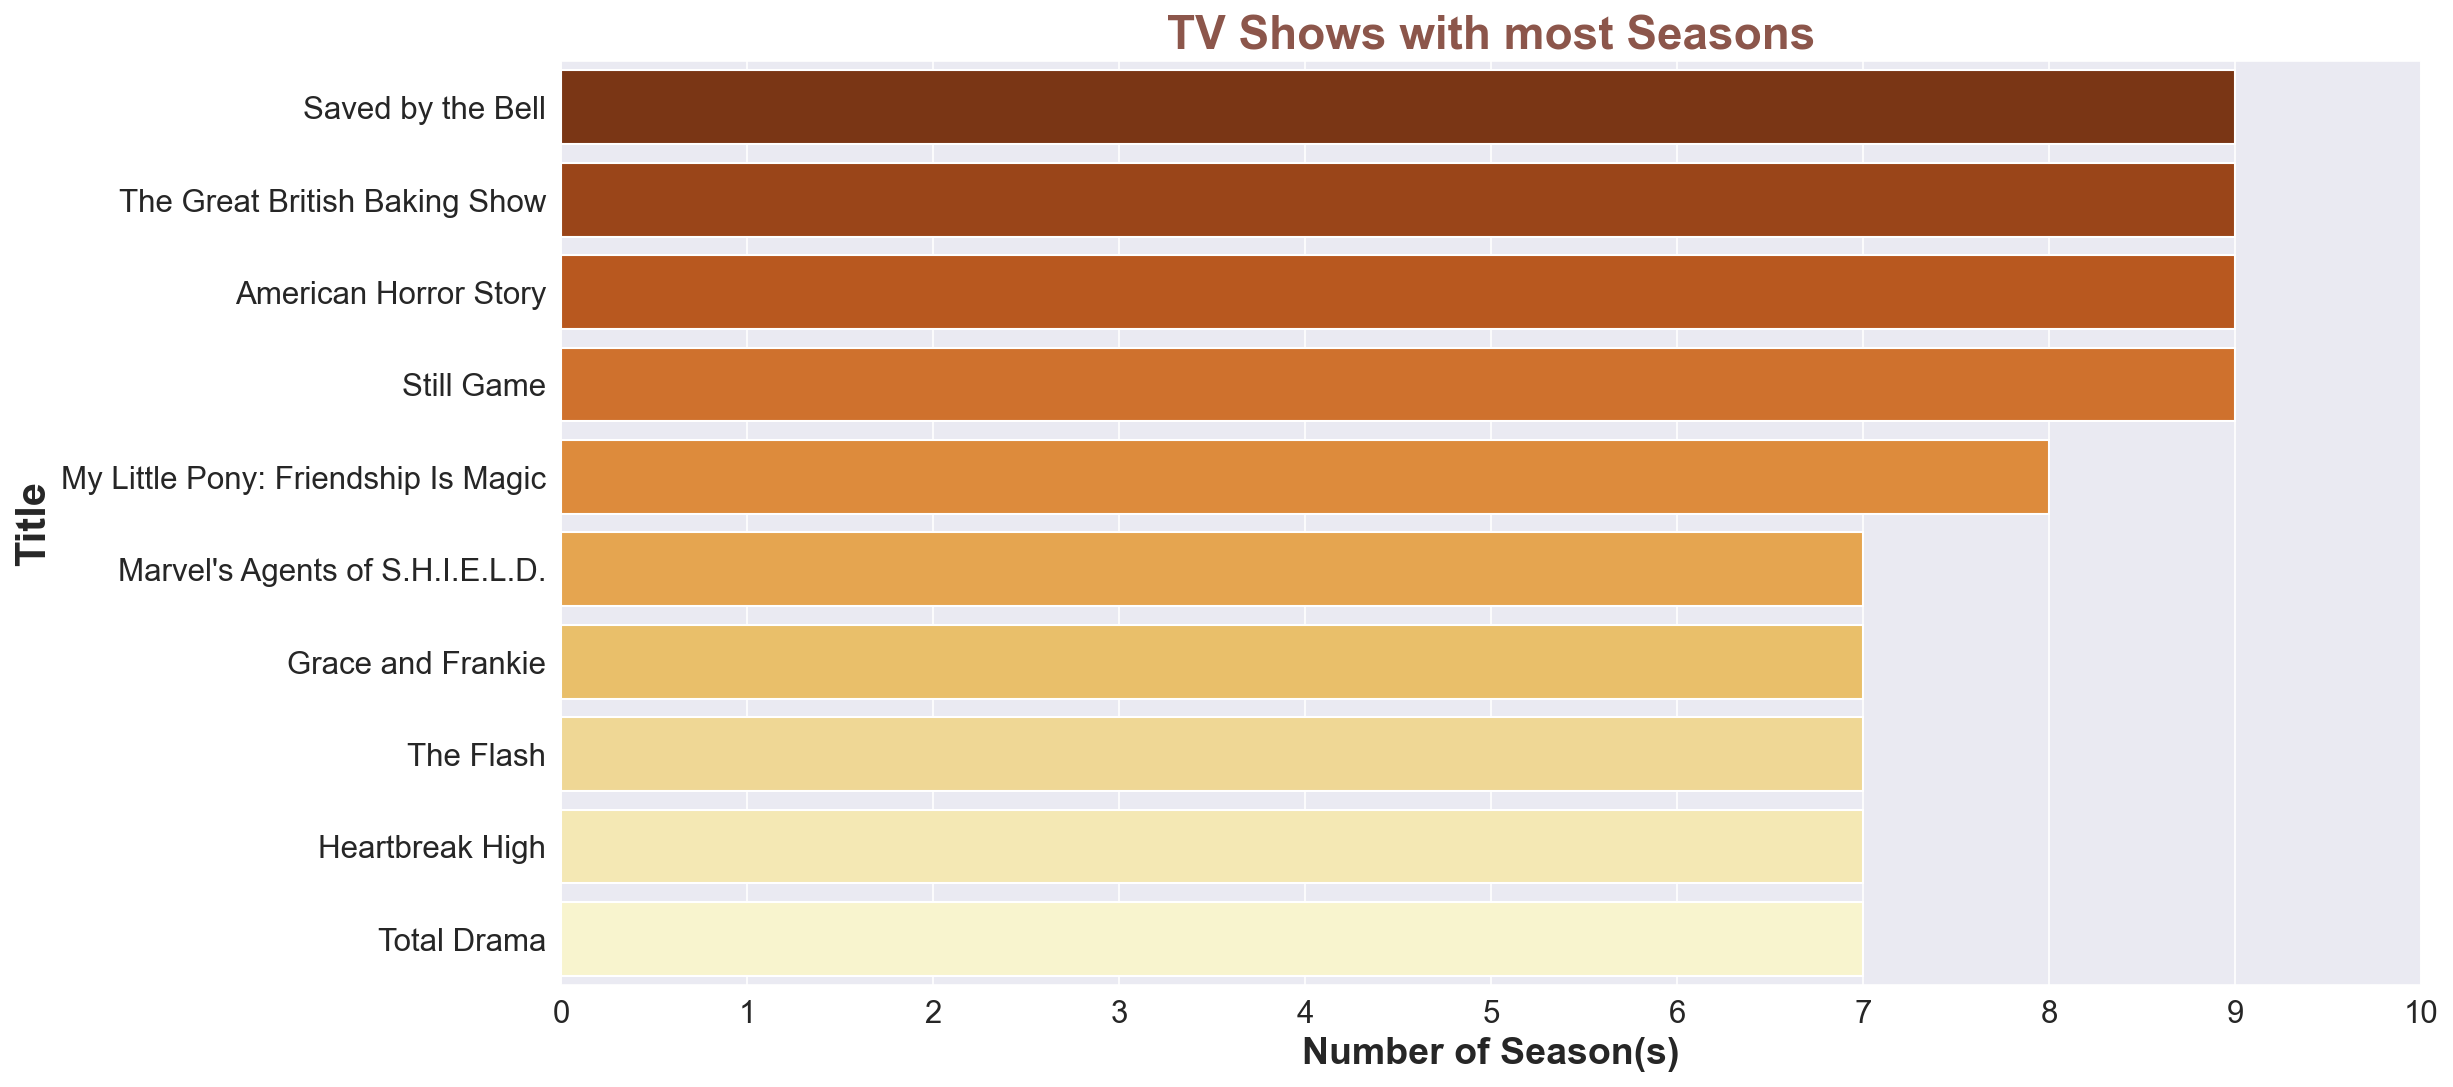

In [123]:
most_seasons = nf_tv[['duration', 'title']].sort_values('duration', ascending=False)[:10]
most_seasons['duration'] = most_seasons['duration'].astype('int64')

plt.figure(figsize=(16,8), dpi=150)

sns.barplot(data = most_seasons, y='title', x='duration', palette = 'YlOrBr_r')
plt.ylabel('Title', fontsize=20, weight='semibold')
plt.xlabel('Number of Season(s)', fontsize=18, weight='semibold')
plt.xticks(range(0,11), fontsize=15)
plt.yticks(fontsize=15)
plt.title('TV Shows with most Seasons', fontsize=22, weight='semibold', color='tab:brown')
plt.show()

In [124]:
 rat = netflix.groupby('rating')['rating'].count().sort_values(ascending=False)
rat

rating
TV-MA    598
TV-14    410
R        207
PG-13    155
TV-PG    131
TV-Y7     96
TV-Y      88
PG        69
TV-G      60
G          4
Name: rating, dtype: int64

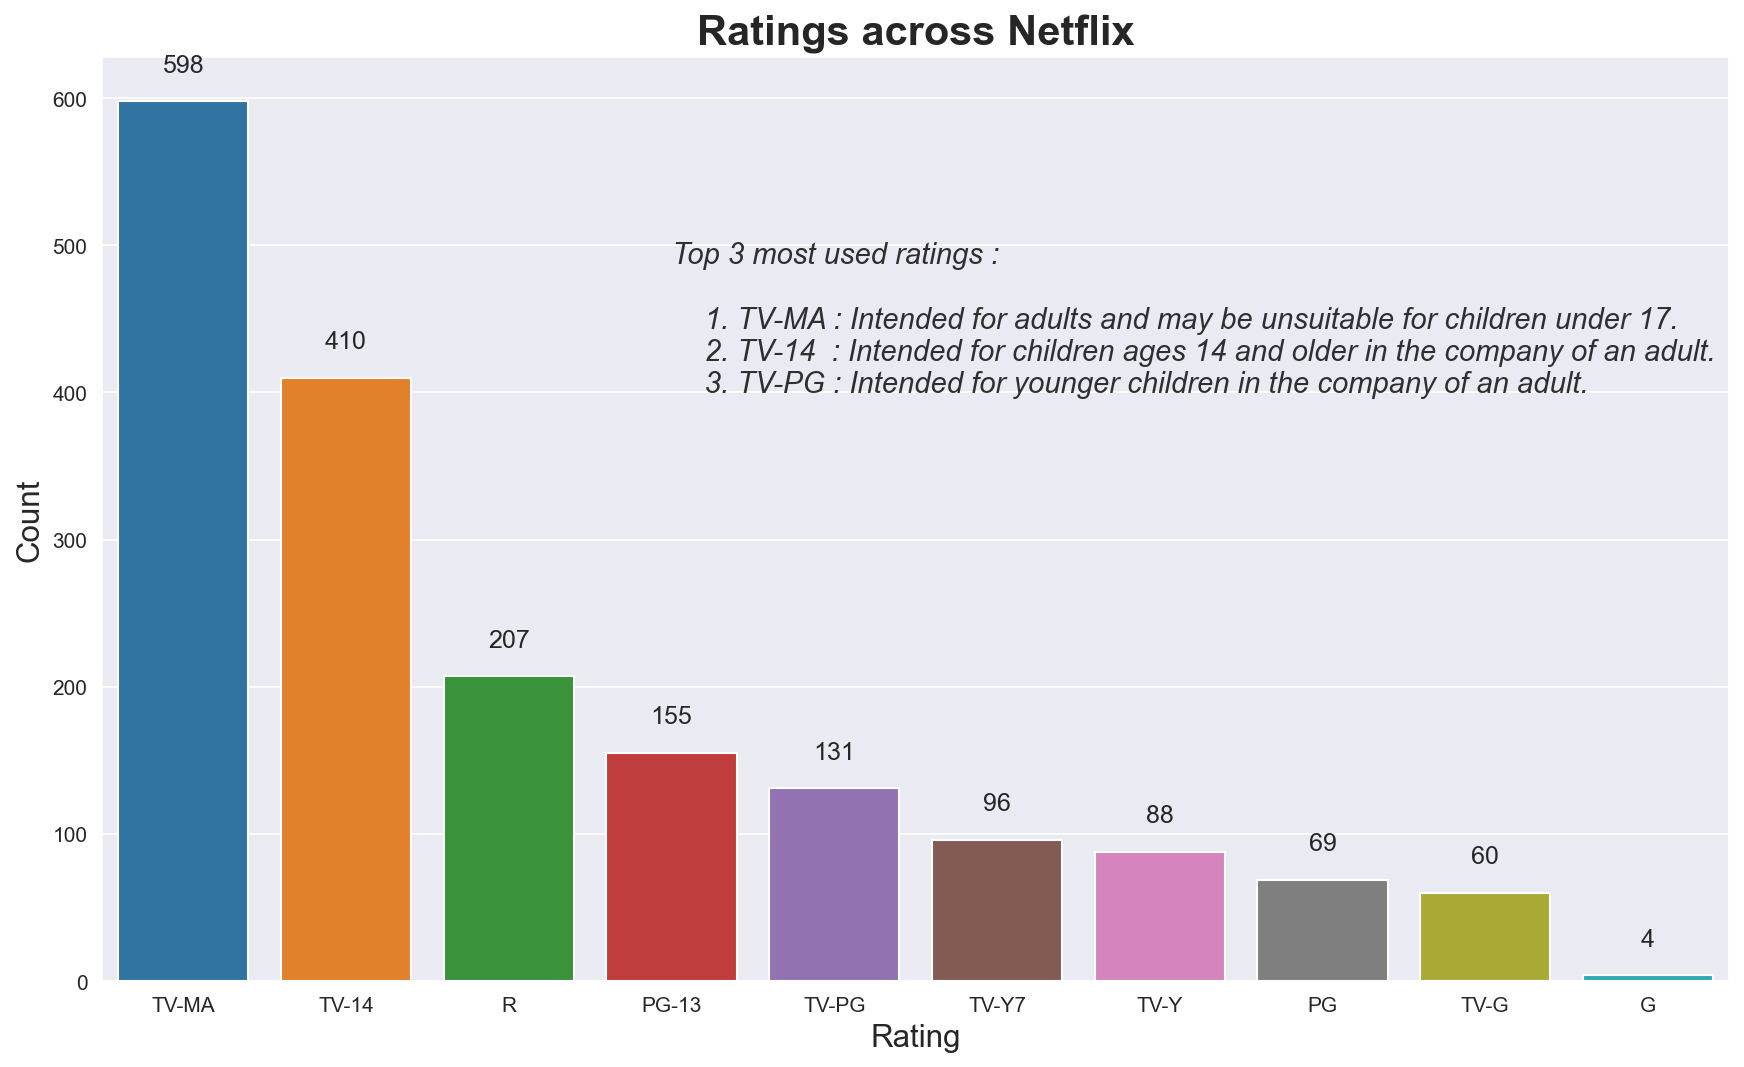

In [125]:
plt.figure(figsize = (14,8), dpi=150)

graph = sns.countplot(x='rating', data = netflix, order=rat.index)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Ratings across Netflix', fontsize=20, weight='semibold')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 20, height , ha="center", fontsize=12)

text3 = 'Top 3 most used ratings :\n\n    1. TV-MA : Intended for adults and may be unsuitable for children under 17.\n    2. TV-14  : Intended for children ages 14 and older in the company of an adult.\n    3. TV-PG : Intended for younger children in the company of an adult.'
plt.text(3, 400, text3, horizontalalignment='left', color='black', fontsize=14, alpha=0.8, fontstyle='italic')
plt.show()

# The Director

In [126]:
directors_m = nf_movies.director.dropna()
directors_tv = nf_tv.director.dropna()

In [127]:
top_10_movie_dir = pd.DataFrame(directors_m.value_counts().sort_values(ascending=False).head(10))
print(top_10_movie_dir)

                     director
Rajiv Chilaka              16
Suhas Kadav                15
Hidenori Inoue              7
Cathy Garcia-Molina         6
Lasse Hallström             5
Don Michael Paul            4
Rathindran R Prasad         4
Kayode Kasum                4
Milan Luthria               4
Toshiya Shinohara           4


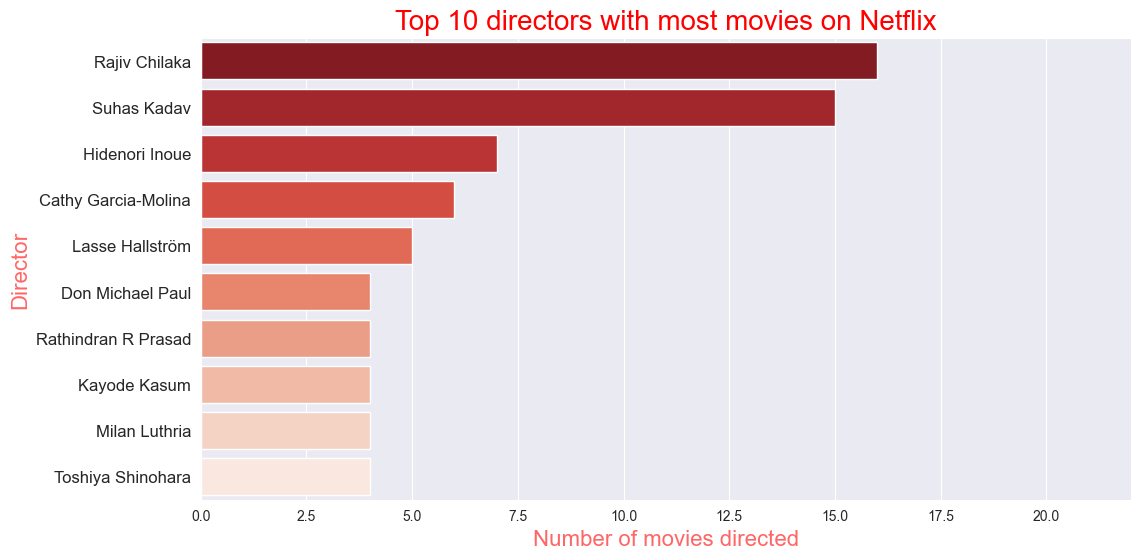

In [128]:
plt.figure(figsize = (12,6), dpi=100)
sns.barplot(x=top_10_movie_dir.director, y=top_10_movie_dir.index, palette='Reds_r')

plt.xlim([0,22])
plt.yticks(fontsize=12)
plt.xlabel('Number of movies directed', fontsize=16, alpha=0.6).set_color('red')
plt.ylabel("Director", fontsize = 16, alpha=0.6).set_color('red')
plt.title('Top 10 directors with most movies on Netflix', fontsize=20).set_color('red')

plt.show()

In [129]:
top_10_tv_dir = pd.DataFrame(directors_tv.value_counts().sort_values(ascending=False).head(6))
top_10_tv_dir

,director
Hsu Fu-chun,2
Daniel Minahan,1
Andy Devonshire,1
Kongkiat Komesiri,1
Olivier Megaton,1
Bunmi Ajakaiye,1


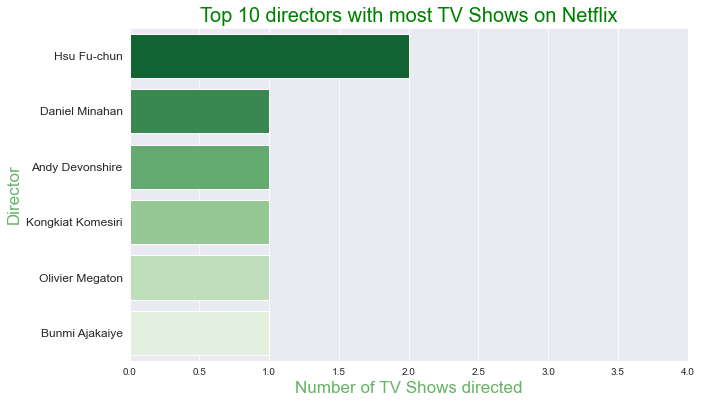

In [130]:
plt.figure(figsize = (10,6), dpi=72)
sns.barplot(x=top_10_tv_dir.director, y=top_10_tv_dir.index, palette='Greens_r')
plt.yticks(fontsize=12)

plt.xlim([0,4])
plt.xlabel('Number of TV Shows directed', fontsize=17, alpha=0.6).set_color('green')
plt.ylabel("Director", fontsize = 17, alpha=0.6).set_color('green')
plt.title('Top 10 directors with most TV Shows on Netflix', fontsize=20).set_color('green')

plt.show()

# Most casted Actors

In [131]:
actors = pd.DataFrame(netflix.cast.value_counts()[:10])
labels = ['David Attenborough', 'Samuel West', 'Jeff Dunham', 'Kevin Hart',
       'Michela Luci, \n Jamie Watson,\n  Eric Peterson,\n  Anna Claire Bartlam,\n  Nicolas Aqui,\n  Cory Doran,\n  Julie Lemieux,\n  Derek McGrath',
       'Craig Sechler', 'Bill Burr', 'Iliza Shlesinger', 'Jim Gaffigan',
       'Jay O. Sanders']

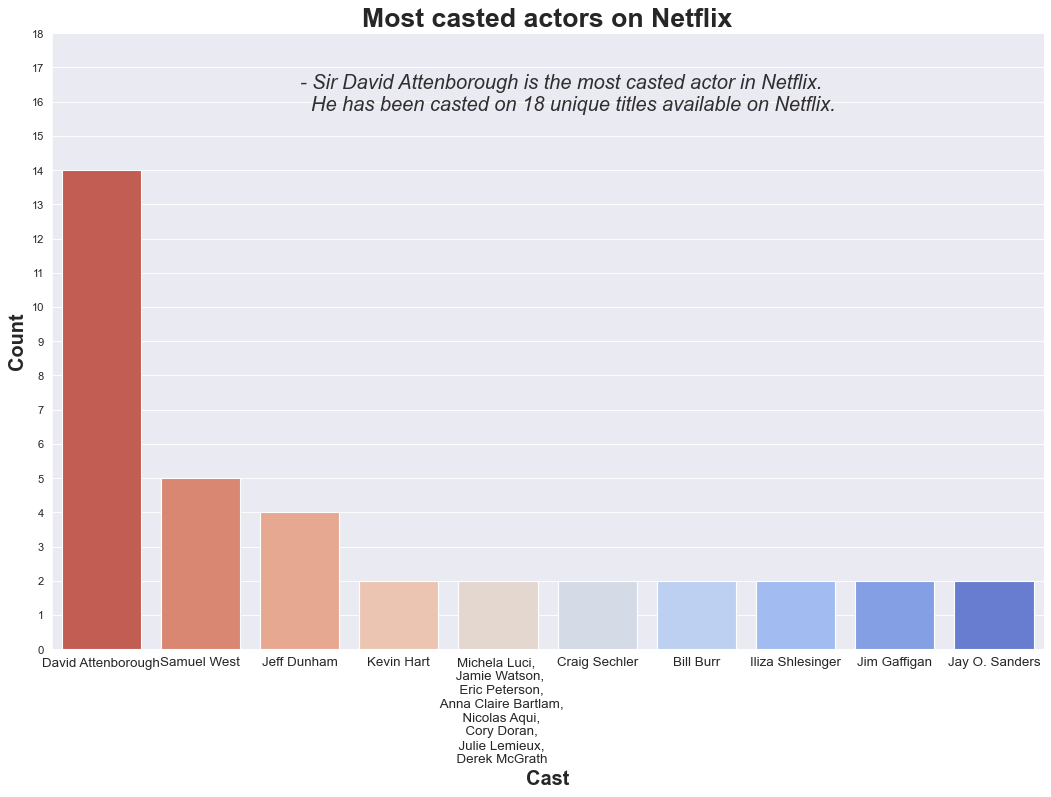

In [132]:
plt.figure(figsize=(16,10), dpi=80)

sns.barplot(x=labels, y='cast', data=actors, palette='coolwarm_r')
plt.xticks(fontsize = 12)
plt.yticks(range(0,19))
plt.title('Most casted actors on Netflix', fontsize=24, weight='semibold')
plt.xlabel('Cast', fontsize=18, weight='semibold')
plt.ylabel('Count', fontsize=18, weight='semibold')

text4 = '- Sir David Attenborough is the most casted actor in Netflix.\n  He has been casted on 18 unique titles available on Netflix. '
plt.text(2, 15.75, text4, horizontalalignment='left', color='black', fontsize=18, alpha=0.8, fontstyle='italic')
plt.show()

# Genres

In [133]:
genre_mov  = netflix['listed_in'][netflix.type == 'Movie']
print('Total unique movie genres : {}'.format(genre_mov.value_counts().shape[0]))

genre_tv = netflix['listed_in'][netflix.type == 'TV Show']
print('Total unique TV Shows genres : {}'.format(genre_tv.value_counts().shape[0]))

Total unique movie genres : 163
Total unique TV Shows genres : 137


In [134]:
genre_m = pd.DataFrame(genre_mov.value_counts()[:10])
genre_m

,listed_in
"""Dramas, International Movies""",72
"""Comedies, Dramas, International Movies""",54
Children & Family Movies,53
"""Children & Family Movies, Comedies""",52
Action & Adventure,45
Documentaries,44
"""Dramas, International Movies, Romantic Movies""",43
Dramas,36
"""Comedies, International Movies""",33
"""Dramas, Independent Movies, International Movies""",33


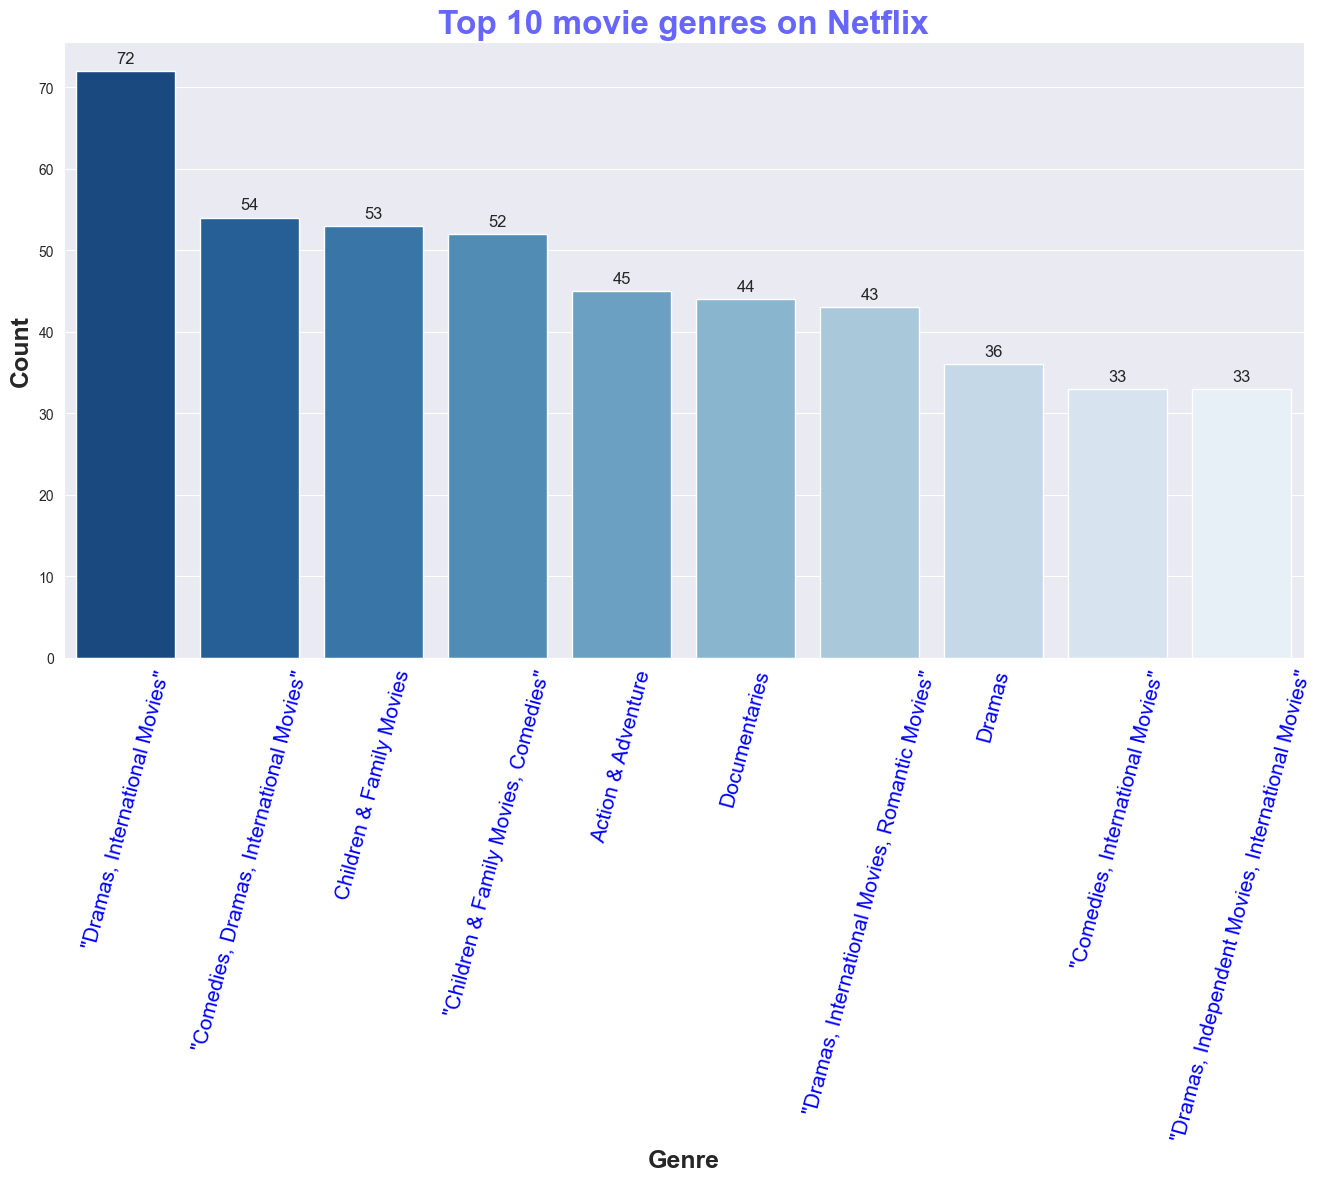

In [135]:
plt.figure(figsize=(16,8), dpi=100)

graph = sns.barplot(x=genre_m.index, y=genre_m.listed_in, palette='Blues_r')
plt.xticks(fontsize = 15, rotation=75, color='b')
plt.title('Top 10 movie genres on Netflix', fontsize=24, weight='semibold', color='b', alpha=0.6)
plt.xlabel('Genre', fontsize=18, weight='semibold')
plt.ylabel('Count', fontsize=18, weight='semibold')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 1, int(height) , ha="center", fontsize=12)
    
plt.show()

In [136]:
genre_tv = pd.DataFrame(genre_tv.value_counts()[:10])
genre_tv

,listed_in
Kids' TV,58
Reality TV,35
"""Kids' TV, TV Comedies""",31
"""International TV Shows, Romantic TV Shows, TV Comedies""",30
"""International TV Shows, TV Dramas""",22
Docuseries,21
"""Crime TV Shows, International TV Shows, TV Dramas""",18
"""Anime Series, International TV Shows""",18
TV Comedies,16
"""Crime TV Shows, International TV Shows, Spanish-Language TV Shows""",15


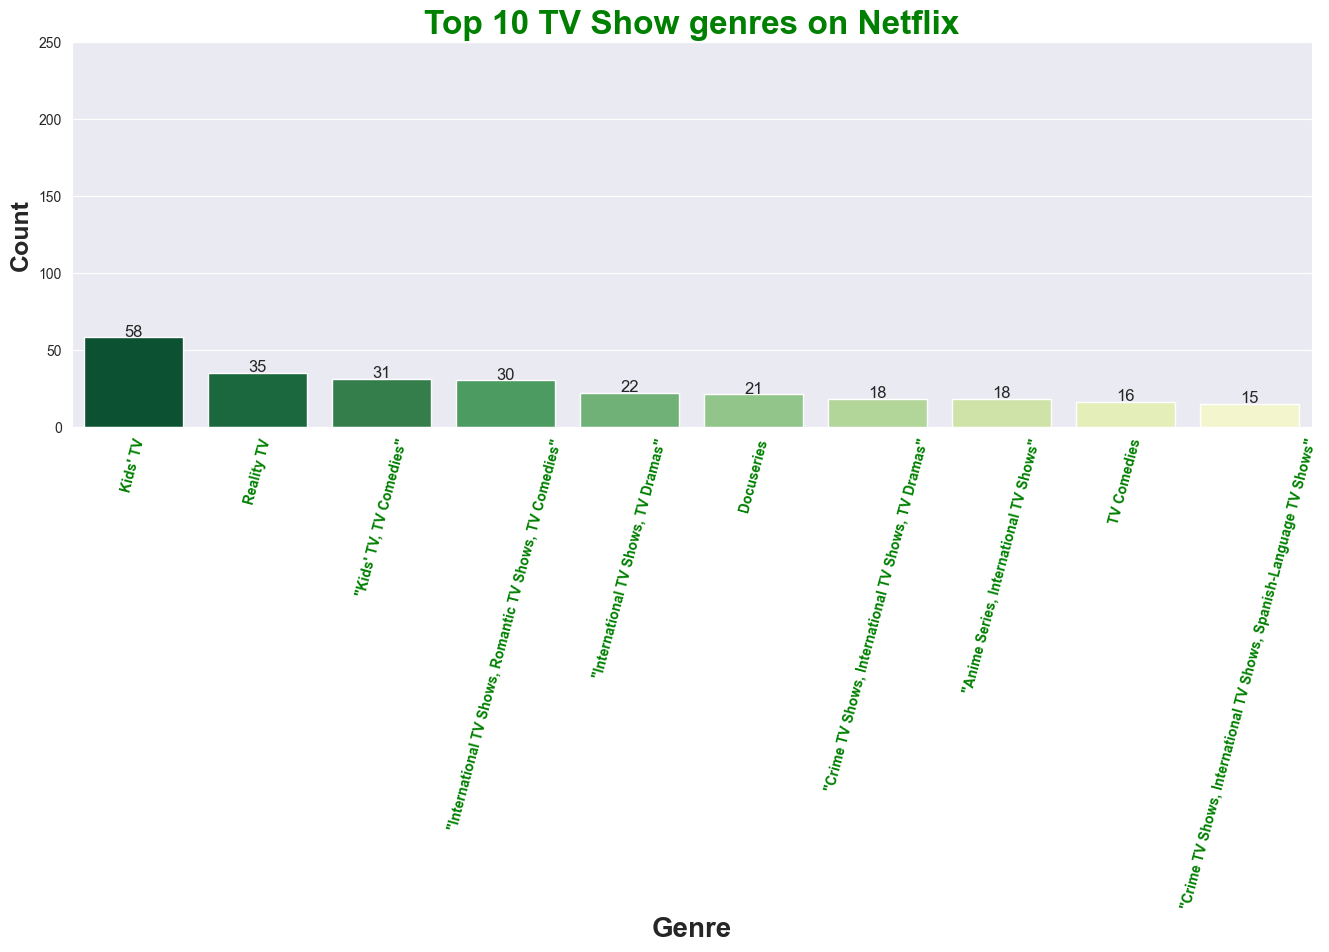

In [137]:
plt.figure(figsize=(16,5), dpi=100)

graph = sns.barplot(x=genre_tv.index, y=genre_tv.listed_in, palette='YlGn_r')
plt.xticks(fontsize = 10, rotation=75, color='g', weight='semibold')
plt.title('Top 10 TV Show genres on Netflix', fontsize=24, weight='semibold', color='g')
plt.xlabel('Genre', fontsize=20, weight='semibold')
plt.ylabel('Count', fontsize=18, weight='semibold')
plt.ylim([0,250])

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 1, int(height) , ha="center", fontsize=12)
    
plt.show()

In [138]:
release_m = pd.DataFrame(nf_movies.release_year.value_counts()).sort_index()
release_tv = pd.DataFrame(nf_tv.release_year.value_counts()).sort_index()
print(release_m.head(3))
print(release_tv.head(3))

      release_year
1954             1
1959             1
1961             1
      release_year
1945             1
1992             1
1993             1


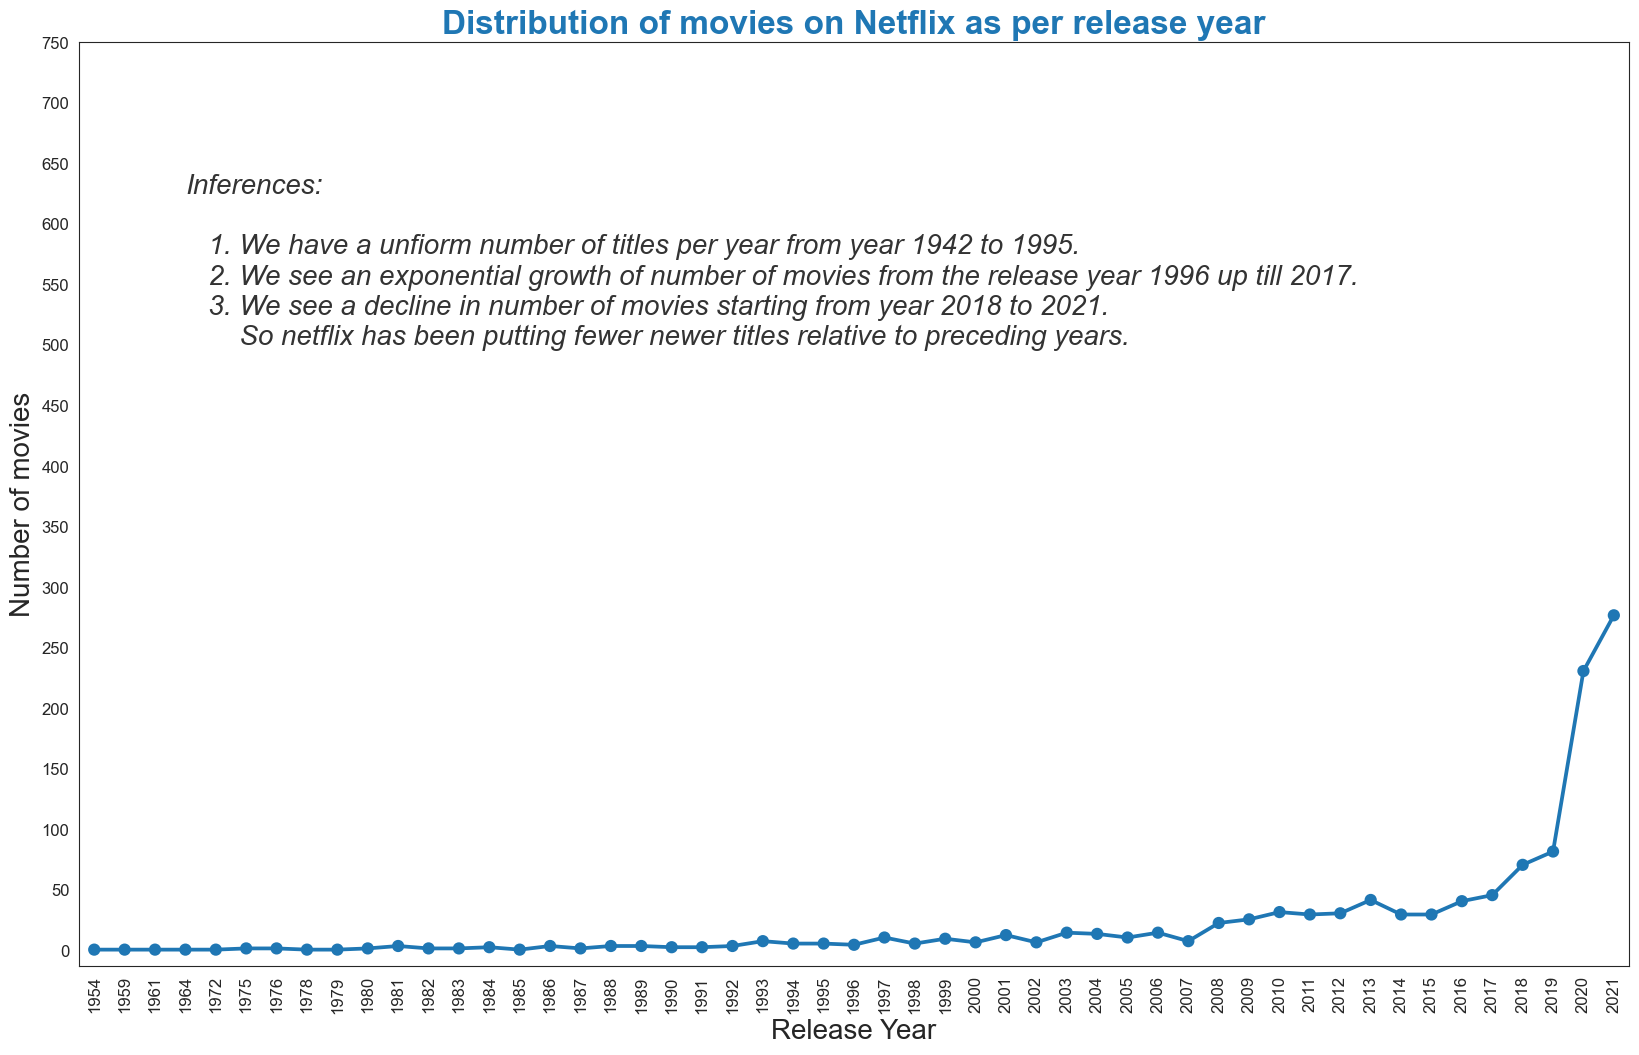

In [139]:
plt.figure(figsize=(20,12), dpi=100)
sns.set_style('white')

sns.pointplot(x = release_m.index, y = release_m.release_year)
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(range(0,800,50), fontsize = 12)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Number of movies', fontsize=20)
plt.title('Distribution of movies on Netflix as per release year', fontsize=24, weight='bold', color='tab:blue')

text5 = 'Inferences:\n\n   1. We have a unfiorm number of titles per year from year 1942 to 1995.\n   2. We see an exponential growth of number of movies from the release year 1996 up till 2017.\n   3. We see a decline in number of movies starting from year 2018 to 2021.\n       So netflix has been putting fewer newer titles relative to preceding years.'
plt.text(3, 500, text5, horizontalalignment='left', color='black', fontsize=20, fontstyle='italic', alpha=0.8)

plt.show()

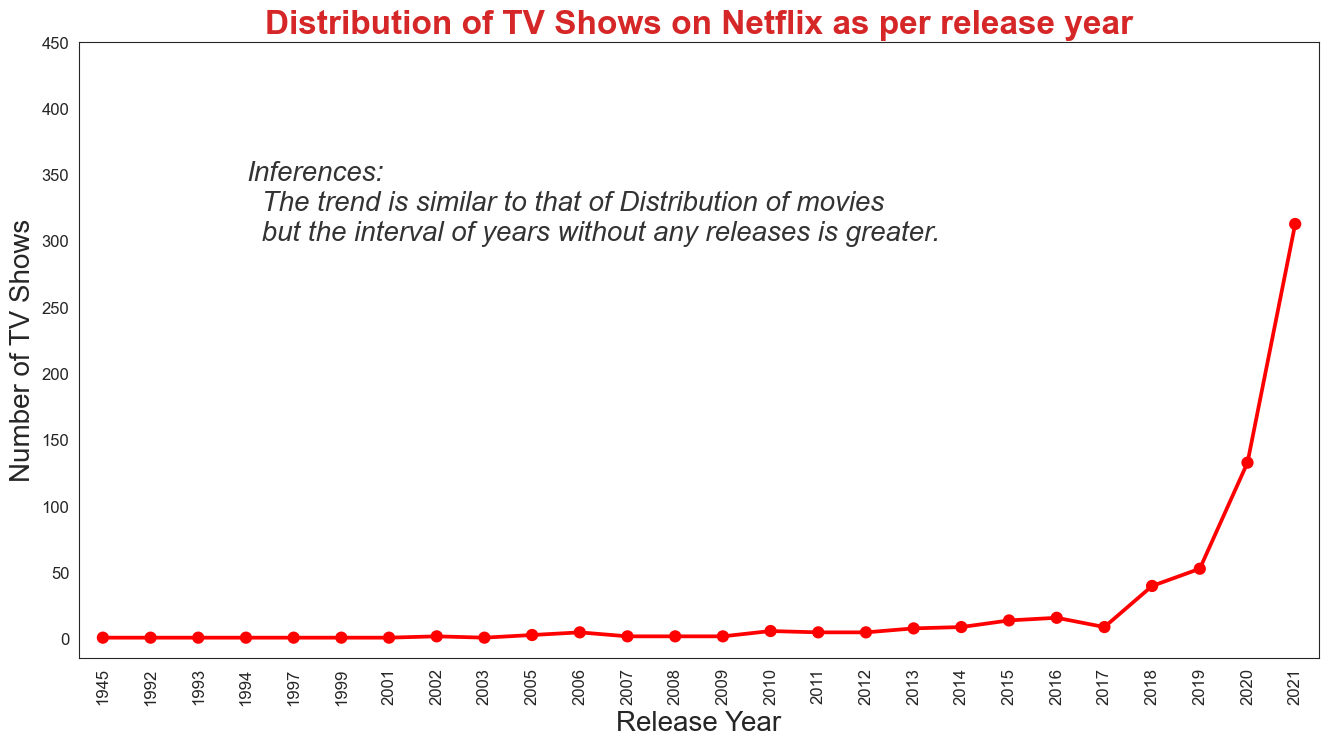

In [140]:
plt.figure(figsize=(16,8), dpi=100)


sns.pointplot(x = release_tv.index, y = release_tv.release_year, color = 'r')
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(range(0,500,50), fontsize = 12)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Number of TV Shows', fontsize=20)
plt.title('Distribution of TV Shows on Netflix as per release year', fontsize=24, weight='bold', color='tab:red')

text6 = 'Inferences:\n  The trend is similar to that of Distribution of movies\n  but the interval of years without any releases is greater.'
plt.text(3, 300, text6, horizontalalignment='left', color='black', fontsize=20, fontstyle='italic', alpha=0.8)

plt.show()

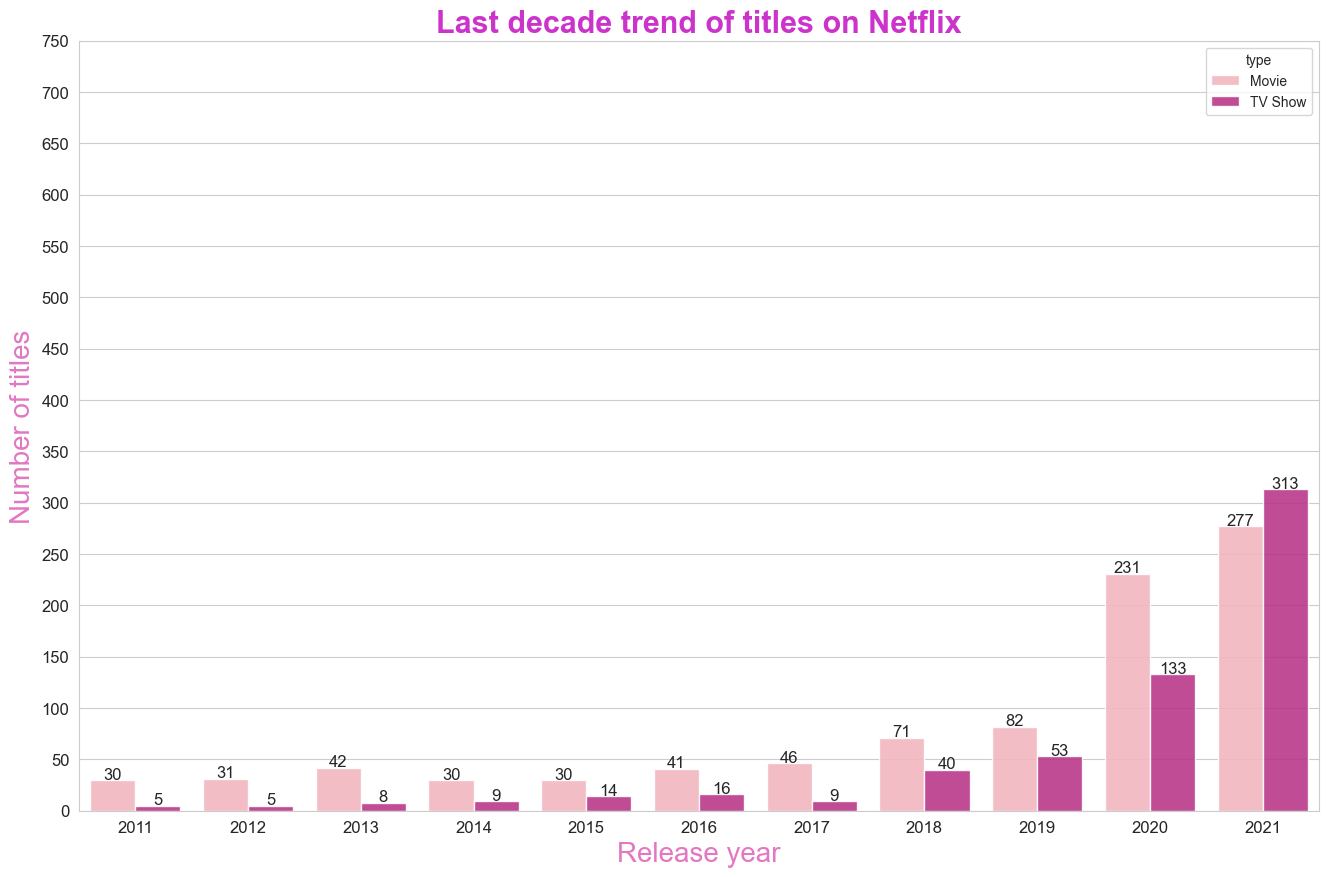

In [141]:
decade = netflix[netflix.release_year > 2010]
plt.figure(figsize=(16,10), dpi=100)
sns.set_style('whitegrid')

graph = sns.countplot(x="release_year", data=decade, hue="type", palette='RdPu', alpha=0.9)
plt.xticks(fontsize=12)
plt.yticks(range(0,800,50), fontsize=12)
plt.xlabel('Release year', fontsize = 20, color='tab:pink')
plt.ylabel('Number of titles', fontsize = 20, color='tab:pink')
plt.title('Last decade trend of titles on Netflix', fontsize=22, color='m', weight='bold', alpha=0.8)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 1, int(height) , ha="center", fontsize=12)

plt.show()

# Content added on netflix over the years

In [142]:
added    = pd.DataFrame(netflix.year_added.value_counts()).sort_index()
added_m  = pd.DataFrame(nf_movies.year_added.value_counts()).sort_index()
added_tv = pd.DataFrame(nf_tv.year_added.value_counts()).sort_index()

In [143]:
plot1 = go.Scatter(y=added_m['year_added'], x=added_m.index, name="Movies", marker=dict(color="blue"))
plot2 = go.Scatter(y=added_tv['year_added'], x=added_tv.index, name="TV Shows", marker=dict(color="green"))
plot3 = go.Scatter(y=added['year_added'], x=added.index, name="Total Content", marker=dict(color="red"))

data = [plot1, plot2, plot3]

layout = go.Layout(title="Content added on Netflix over the years", margin=dict(l=20, b=20), legend=dict(x=0.01, y=0.98, orientation='v'))
fig = go.Figure(data, layout=layout)
fig.show()

# Content by countries

In [144]:
country = pd.DataFrame(netflix.country.value_counts()[:15])


In [145]:
fig = px.pie(country, values=country.country, names=country.index, title='Total Netflix content by Countries', height=800, width=800)
fig.show()